# Bank Marketing Campaign Analysis

I will analyze the data to generate insights using the following approach:

1.Gather and import the data  
2.Data cleaning and processing  
3.Analyze the data - exploratory data analysis (EDA)  
4.Visualize the data  

## 1. Gather and Import the Dataset

First, necessary python libraries for data analysis - pandas and numpy are imported. 

In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np

In this project, the bank marketing dataset from the UCI Machine Learning Repository will be utilized. This dataset is also available on Kaggle (https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing). The original dataset contains bank-additional-full.csv, which contains over 41000 observations. It is simplified and reduced to over 4500 rows(just above 10% of the original data) in bank.csv, used in this project. 

### Import the dataset

In [2]:
#import the bank.csv file into this notebook using read_csv function of pandas
df = pd.read_csv('bank.csv')
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In the csv file, items are separated by ';' and so it appears as above. To solve this, fill the parameters as follows. 

In [3]:
df = pd.read_csv('bank.csv',sep=';',true_values = ['yes'],false_values = ['no']) #separator ';' and 'yes' and 'no' values are regarded as 'True' and 'False' boolean values respectively
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,False,-333,True,False,cellular,30,jul,329,5,-1,0,unknown,False
4517,57,self-employed,married,tertiary,True,-3313,True,True,unknown,9,may,153,1,-1,0,unknown,False
4518,57,technician,married,secondary,False,295,False,False,cellular,19,aug,151,11,-1,0,unknown,False
4519,28,blue-collar,married,secondary,False,1137,False,False,cellular,6,feb,129,4,211,3,other,False


By this way, the dataset is stored in a dataframe named 'df'. It shows as above.

In [4]:
#check the number of rows and columns of dataset using shape
df.shape

(4521, 17)

So, there are 4521 rows and 17 columns

## 2. Data cleaning and Processing

For data cleaning, null values are checked and if found,they are removed or filled with appropiate values.

### Checking and handling null values

In [5]:
#check the null values using isnull 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Due to the result, there are no null values in this dataframe or dataset.  
The methods to remove or fill null values will be shown although it is not necessary in this dataset. 

In [6]:
#remove the null values using dropna function 
df.dropna(inplace=True)
df.isnull().sum() # null values are checked again

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

To fill the null values, specific value of the respective column (eg. mean, median, mode ) can be calculated and used. 

In [7]:
# median value of age is calculated and used to fill the null values of 'age' column
imputed_value_age =df['age'].median()
df['age'].fillna(imputed_value_age, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\653263559.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(imputed_value_age, inplace=True)


In [8]:
# mean/average of balance is calculated and used to fill the null values of the 'balance' column
imputed_value_balance = df['balance'].mean()
df["balance"].fillna(imputed_value_balance, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\4137513698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["balance"].fillna(imputed_value_balance, inplace=True)


In [9]:
# most common type (mode) of education is found and used to the null values of the 'education' column
most_common_education = df['education'].value_counts().idxmax()
df['education'].fillna(most_common_education, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\1331813047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(most_common_education, inplace=True)


In [10]:
#check the first 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,-1,0,unknown,False


For data processing, data types are checked and corrected first. 

### Check and Correct data types

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y              bool
dtype: object

Among columns, job, marital, education, contact, poutcome, and month are object data types and should be changed to categorical. 

In [12]:
#change object data type of each column into category type using astype function
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df["contact"] = df["contact"].astype("category")
df["poutcome"] = df["poutcome"].astype("category")

Month is ordinal data type, having order and so its order should be identified first and then changed to categorical (ordinal) type. 

In [13]:
#first, check the unique values of 'month' column
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [14]:
category = ['jan','feb','mar','apr''may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'] # identify the order of months in a list
df['month'] = pd.Categorical(df['month'],categories = category, ordered=True) # change to categorical ordinal type using pd.Categorical, the ordered list is used in categories parameter. 
df.dtypes # check the data type again

age             int64
job          category
marital      category
education    category
default          bool
balance         int64
housing          bool
loan             bool
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y                bool
dtype: object

The names of some columns should be edited for better understanding. 

In [15]:
# check the names of the columns first
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

The 'housing' column is changed to 'presence_of_housing_loan' and 'loan' to 'presence_of_personal_loan' using rename function as follows. 

In [16]:
df=df.rename(columns = {
    'housing':'presence_of_housing_loan',
    'loan':'presence_of_personal_loan'
    })

In [17]:
# check the names of the columns again
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'presence_of_housing_loan', 'presence_of_personal_loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

The 'default' column is unnecessary and it will be removed using drop function as follow. 

In [18]:
df.drop('default',axis=1,inplace=True) #remove default column
df.head(3) # check the dataset 

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False
2,35,management,single,tertiary,1350,True,False,cellular,16,NaN,185,1,330,1,failure,False


## 3. Analyze the data - exploratory data analysis (EDA)

After the data is cleaned and processed completely, it becomes ready for analysis to generate insights. 

Data can be sliced or filtered to view only specific rows or columns and analyze on this part.  

### Slicing

Specific column(s) can be extracted with the name(s) as follows.

In [19]:
# extract single column
df['education'] # return a pandas.series

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
          ...    
4516    secondary
4517     tertiary
4518    secondary
4519    secondary
4520     tertiary
Name: education, Length: 4521, dtype: category
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

In [20]:
#extract 2 or more columns and return them in a dataframe
df[['age','marital','education']]

,age,marital,education
0,30,married,primary
1,33,married,secondary
2,35,single,tertiary
3,30,married,tertiary
4,59,married,secondary
...,...,...,...
4516,33,married,secondary
4517,57,married,tertiary
4518,57,married,secondary
4519,28,married,secondary


A specific part of the dataset can be selected by index using the loc function.

In [21]:
# Select all columns from the specific row with index '3'
df.loc[3]

age                                  30
job                          management
marital                         married
education                      tertiary
balance                            1476
presence_of_housing_loan           True
presence_of_personal_loan          True
contact                         unknown
day                                   3
month                               jun
duration                            199
campaign                              4
pdays                                -1
previous                              0
poutcome                        unknown
y                                 False
Name: 3, dtype: object

In [22]:
# A specific range of rows can also be selected with loc function
df.loc[1:5] # rows with index 1 to 5 are extracted. 

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False
2,35,management,single,tertiary,1350,True,False,cellular,16,NaN,185,1,330,1,failure,False
3,30,management,married,tertiary,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,0,True,False,unknown,5,NaN,226,1,-1,0,unknown,False
5,35,management,single,tertiary,747,False,False,cellular,23,feb,141,2,176,3,failure,False


In [23]:
df.loc[455:460] # rows with index 455 to 460 are extracted. 

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
455,42,blue-collar,married,secondary,117,True,False,unknown,9,NaN,147,1,-1,0,unknown,False
456,34,self-employed,single,tertiary,5462,False,False,cellular,30,NaN,430,1,-1,0,unknown,True
457,25,services,single,secondary,402,False,True,cellular,7,jul,264,1,-1,0,unknown,False
458,40,technician,single,secondary,641,False,False,cellular,16,jul,156,6,-1,0,unknown,False
459,43,management,divorced,tertiary,36,False,False,cellular,26,NaN,118,1,102,2,failure,False
460,55,unemployed,married,tertiary,383,False,False,unknown,6,NaN,343,3,-1,0,unknown,False


Not only rows, but also columns can be specified as follows.

In [24]:
df[['age','marital','balance']].loc[455:460] # the rows with index 455 to 460 and their values in specific columns: age, marital and balance are selected.

,age,marital,balance
455,42,married,117
456,34,single,5462
457,25,single,402
458,40,single,641
459,43,divorced,36
460,55,married,383


Specific part of dataset can be selected by position using iloc function. 

In [26]:
df.iloc[0:5] # the rows from 0 to 4 are extracted. As columns are not specified, all columns are returned. 

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False
2,35,management,single,tertiary,1350,True,False,cellular,16,NaN,185,1,330,1,failure,False
3,30,management,married,tertiary,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,0,True,False,unknown,5,NaN,226,1,-1,0,unknown,False


In [27]:
df.iloc[0:5,2:5] # the rows with index from 0 to 4 and the columns with index 2 to 4 are extracted. 

,marital,education,balance
0,married,primary,1787
1,married,secondary,4789
2,single,tertiary,1350
3,married,tertiary,1476
4,married,secondary,0


If the columns need to be specified with their names, the loc function can be used instead of iloc.  

In [28]:
df.loc[0:5,'marital':'balance'] #the rows with index from 0 to 5 and the columns from 'marital' to 'balance' are extracted.

,marital,education,balance
0,married,primary,1787
1,married,secondary,4789
2,single,tertiary,1350
3,married,tertiary,1476
4,married,secondary,0
5,single,tertiary,747


In [30]:
df.loc[0:5,['marital','balance','presence_of_housing_loan','y']] # specific column names can be used instead of description of the range. 

,marital,balance,presence_of_housing_loan,y
0,married,1787,False,False
1,married,4789,True,False
2,single,1350,True,False
3,married,1476,True,False
4,married,0,True,False
5,single,747,False,False


### Filtering

A particular necessary condition can be used to filter the dataset as follows.

In [31]:
#single condition using a comparison operator
df[df['age']>30] # the rows with age above 30 will  be extracted

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False
2,35,management,single,tertiary,1350,True,False,cellular,16,NaN,185,1,330,1,failure,False
4,59,blue-collar,married,secondary,0,True,False,unknown,5,NaN,226,1,-1,0,unknown,False
5,35,management,single,tertiary,747,False,False,cellular,23,feb,141,2,176,3,failure,False
6,36,self-employed,married,tertiary,307,True,False,cellular,14,NaN,341,1,330,2,other,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,services,single,secondary,473,True,False,cellular,7,jul,624,5,-1,0,unknown,False
4516,33,services,married,secondary,-333,True,False,cellular,30,jul,329,5,-1,0,unknown,False
4517,57,self-employed,married,tertiary,-3313,True,True,unknown,9,NaN,153,1,-1,0,unknown,False
4518,57,technician,married,secondary,295,False,False,cellular,19,aug,151,11,-1,0,unknown,False


Multiple conditions can be combined using AND (&) or OR (|) operators (Bitwise Operators) to extract specific data. 

In [33]:
# multiple conditions are combined, rows with the age above 30, and married, and the presence of a housing plan or loan are selected. 
df[(df['age']>30) & (df['marital']=='married') & ((df['presence_of_housing_loan']==True) | (df['presence_of_personal_loan']==True))]

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False
4,59,blue-collar,married,secondary,0,True,False,unknown,5,NaN,226,1,-1,0,unknown,False
6,36,self-employed,married,tertiary,307,True,False,cellular,14,NaN,341,1,330,2,other,False
7,39,technician,married,secondary,147,True,False,cellular,6,NaN,151,2,-1,0,unknown,False
8,41,entrepreneur,married,tertiary,221,True,False,unknown,14,NaN,57,2,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,46,blue-collar,married,secondary,668,True,False,unknown,15,NaN,1263,2,-1,0,unknown,True
4512,40,blue-collar,married,secondary,1100,True,False,unknown,29,NaN,660,2,-1,0,unknown,False
4514,38,blue-collar,married,secondary,1205,True,False,cellular,20,NaN,45,4,153,1,failure,False
4516,33,services,married,secondary,-333,True,False,cellular,30,jul,329,5,-1,0,unknown,False


### Exploratory Data Analysis (EDA)

Exploratory data analysis of the dataset can be performed as follows. 

The info Function will display a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage. It is useful for getting a quick overview of the dataset's structure.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        4521 non-null   int64   
 1   job                        4521 non-null   category
 2   marital                    4521 non-null   category
 3   education                  4521 non-null   category
 4   balance                    4521 non-null   int64   
 5   presence_of_housing_loan   4521 non-null   bool    
 6   presence_of_personal_loan  4521 non-null   bool    
 7   contact                    4521 non-null   category
 8   day                        4521 non-null   int64   
 9   month                      2830 non-null   category
 10  duration                   4521 non-null   int64   
 11  campaign                   4521 non-null   int64   
 12  pdays                      4521 non-null   int64   
 13  previous                   4521 n

The descriptive statistics for the numerical columns, such as count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles will be calculated by using the describe function as a quick statistical summary of the dataset.

In [35]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


If the descriptive statistics of not only numerical but also categorical columns are desired, 'include' parameter needs to be set to 'all' in the describe function.   

In [36]:
df.describe(include='all')

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,2830,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,NaN,2,2,3,NaN,10,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,NaN,True,False,cellular,NaN,jul,NaN,NaN,NaN,NaN,unknown,False
freq,NaN,969,2797,2306,NaN,2559,3830,2896,NaN,706,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


The descriptive analytics of selected columns can also be examined as follows:

In [37]:
df[['age','balance']].describe()

,age,balance
count,4521.000000,4521.000000
mean,41.170095,1422.657819
std,10.576211,3009.638142
min,19.000000,-3313.000000
25%,33.000000,69.000000
50%,39.000000,444.000000
75%,49.000000,1480.000000
max,87.000000,71188.000000


### Answering simple questions with data

Questions related to the data can be addressed by using specific functions or methods of pandas on the data.

Q1. What is the number of customers per each marital status?

To answer this question, group by function is used to find the count or number of for each marital status. It helps in understanding the distribution of records across different marital statuses.

In [38]:
df.groupby(by='marital').size()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\725067374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='marital').size()


marital
divorced     528
married     2797
single      1196
dtype: int64

Answer: There are 528 customers with divorced status, 2797 with married, while remaining 1196 are single. 

The groupby function can also be used for more than one column as follows to determine the distribution of customers across different sub-groups. 

In [40]:
# group the customers count for all marital statuses with presence or absence of housing plans and loans 
df.groupby(by=['marital','presence_of_housing_loan','presence_of_personal_loan']).size()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\3101210482.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['marital','presence_of_housing_loan','presence_of_personal_loan']).size()


marital   presence_of_housing_loan  presence_of_personal_loan
divorced  False                     False                         185
                                    True                           45
          True                      False                         253
                                    True                           45
married   False                     False                         999
                                    True                          173
          True                      False                        1345
                                    True                          280
single    False                     False                         493
                                    True                           67
          True                      False                         555
                                    True                           81
dtype: int64

Q2. What are the average balance of married customer with primary education?

For this, groupby function is used to group the DataFrame by both marital status and education level with calculation of the average balance for each group as follows:

In [41]:
#group the marital and education and calculate mean balance for each group
df.groupby(by=['marital','education'])['balance'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\2217590006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['marital','education'])['balance'].mean()


marital   education
divorced  primary      1072.721519
          secondary     891.181481
          tertiary     1437.896774
          unknown      1849.333333
married   primary      1371.638783
          secondary    1272.911002
          tertiary     1860.719395
          unknown      1725.547009
single    primary      2065.753425
          secondary    1154.008210
          tertiary     1754.711538
          unknown      1562.173913
Name: balance, dtype: float64

Answer: The average balance of married customer with primary education is 1371.63 $. 

Q3. What is the percentage of subscribers among the customers with a balance greater than 10.000 euros and without housing loan?

To address this, data is filtered to get the required dataset of customers with a balance more than 10.000 euros and without housing loan. 

In [43]:
df_filtered = df[ (df['balance']>10000) & (df['presence_of_housing_loan']==False) ]
df_filtered

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
64,56,admin.,married,secondary,16873,False,False,cellular,7,oct,223,1,-1,0,unknown,False
94,57,blue-collar,married,secondary,14093,False,False,cellular,11,aug,231,5,-1,0,unknown,False
213,57,self-employed,married,secondary,11494,False,False,cellular,19,nov,198,1,-1,0,unknown,False
272,46,management,married,secondary,12186,False,False,unknown,20,jun,29,3,-1,0,unknown,False
276,35,housemaid,married,tertiary,11219,False,False,cellular,12,aug,699,2,79,1,failure,False
339,51,self-employed,divorced,primary,10924,False,False,cellular,6,NaN,106,2,-1,0,unknown,False
368,60,technician,single,primary,11262,False,False,cellular,26,aug,323,1,-1,0,unknown,True
500,32,management,single,tertiary,12607,False,False,cellular,14,aug,203,5,84,1,failure,False
548,39,management,single,tertiary,12437,False,False,telephone,18,nov,40,1,-1,0,unknown,False
554,43,technician,single,secondary,11269,False,False,unknown,29,NaN,92,1,-1,0,unknown,False


Then, from the filtered dataset, the number of subscribers(y=True) is counted and its percentage among all customers in the filtered group is calculated as follows:

In [44]:
# Percentage of subscribers in the filtered group
number_of_subscribers = df_filtered[ df_filtered['y']==True ].shape[0]
number_of_customers_filtered = df_filtered.shape[0] 
percentage_of_subscribers = number_of_subscribers/ number_of_customers_filtered * 100

print("The total number of subscribers in the filtered group was", percentage_of_subscribers,
      "%, equivalent to", number_of_subscribers, "people")

The total number of subscribers in the filtered group was 6.0 %, equivalent to 3 people


Therefore, 6% among the customers with a balance greater than 10.000 euros and without housing loan subscribed. 

### Feature Engineering

A new variable (column) can be created in the original dataframe as follows:

Assume the balance provided is USD, and a balance in Euro is required. It can be converted to euros by multiplying the exchange rate as follows:

In [45]:
exchange_rate_to_euro = 0.90
df['balance_euro'] = df['balance']* exchange_rate_to_euro  #generate a new column of the balance in euro 
df.head() # check the new column by viewing the dataset

,age,job,marital,education,balance,presence_of_housing_loan,presence_of_personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_euro
0,30,unemployed,married,primary,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False,1608.3
1,33,services,married,secondary,4789,True,True,cellular,11,NaN,220,1,339,4,failure,False,4310.1
2,35,management,single,tertiary,1350,True,False,cellular,16,NaN,185,1,330,1,failure,False,1215.0
3,30,management,married,tertiary,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False,1328.4
4,59,blue-collar,married,secondary,0,True,False,unknown,5,NaN,226,1,-1,0,unknown,False,0.0


## 4. Visualize the data

The data can be visualized by charts, graphs, etc.,  which can provide important insights from these charts.

Python libraires, matplotlib and seaborn, for data visualization are used and so they are imported first. 

In [46]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

A histogram of the age column is created by dividing the data into 10 bins. It visually shows the distribution of ages in the dataset, helping to identify patterns such as skewness or concentration around certain age ranges.

<Axes: >

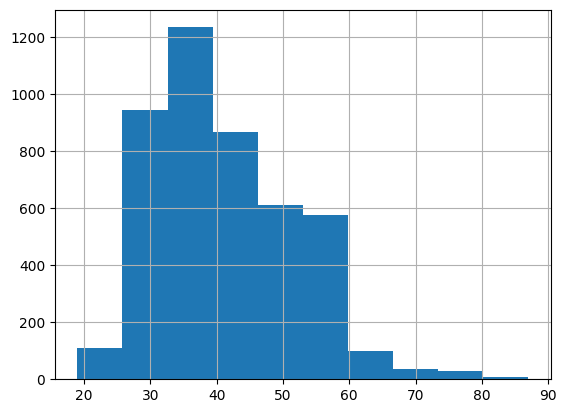

In [47]:
df['age'].hist(bins=10)

From the histogram, it is seen that the most representative group is the age group between 25 and 40.

Then, a column chart will be created to display the average balance (in euros) for different marital statuses and educational levels.
For this, the groupby function is used to group marital status and education with the mean balance for each group. 

In [48]:
#group marital and education with balance in euro
avg_balance_marital_education = df.groupby(by=['marital','education'])['balance_euro'].mean()
avg_balance_marital_education

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14984\2384216305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_marital_education = df.groupby(by=['marital','education'])['balance_euro'].mean()


marital   education
divorced  primary       965.449367
          secondary     802.063333
          tertiary     1294.107097
          unknown      1664.400000
married   primary      1234.474905
          secondary    1145.619902
          tertiary     1674.647455
          unknown      1552.992308
single    primary      1859.178082
          secondary    1038.607389
          tertiary     1579.240385
          unknown      1405.956522
Name: balance_euro, dtype: float64

Then, the result from groupby function will be stored as a dataframe, which is required to create a column chart.

In [49]:
#create a dataframe for the groupby result
avg_balance_marital_education = avg_balance_marital_education.unstack()
avg_balance_marital_education

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,965.449367,802.063333,1294.107097,1664.400000
married,1234.474905,1145.619902,1674.647455,1552.992308
single,1859.178082,1038.607389,1579.240385,1405.956522


A grouped column chart will visualize the average balance by marital status and education level. 
The stacked=False option displays the bars side by side for easy comparison.

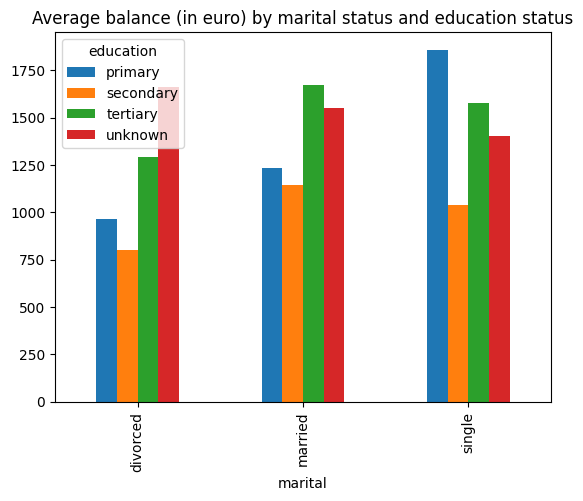

In [50]:
avg_balance_marital_education.plot.bar(stacked=False)
plt.title("Average balance (in euro) by marital status and education status")
plt.show()

A boxplot can be created for the age column, which displays the distribution, central value (median), and potential outliers.  
It provides a visual summary of the age spread in the dataset.

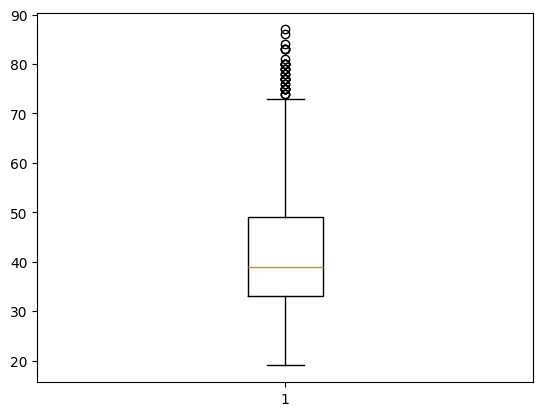

In [51]:
plt.boxplot(df['age'])
plt.show()

### Correlation

Statistical analysis of correlation between numerical variables(columns) can be performed to determine whether there is a positive or negative correlation between 2 variables, and whether it is strong or weak.

First, numerical variables will be extracted in a new dataframe to calculate correlation. 

In [52]:
df_corelations = df[['age','balance','day','duration','campaign','pdays','previous','balance_euro']] #select numerical variables
df_corelations.head() # check the dataframe for correlation

,age,balance,day,duration,campaign,pdays,previous,balance_euro
0,30,1787,19,79,1,-1,0,1608.3
1,33,4789,11,220,1,339,4,4310.1
2,35,1350,16,185,1,330,1,1215.0
3,30,1476,3,199,4,-1,0,1328.4
4,59,0,5,226,1,-1,0,0.0


Pearson correlation coefficients between all numerical columns are calculated using the .corr() method. 
The resulting matrix shows the strength and direction of linear relationships between variables.  
If the value is closer to 1, the correlation is stronger. A positive (+) sign indicates a positive correlation, while a negative (−) sign indicates a negative correlation.

In [53]:
correlations =df_corelations.corr(method="pearson")
correlations

,age,balance,day,duration,campaign,pdays,previous,balance_euro
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.083820
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,1.000000
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.008677
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,-0.015950
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.009976
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.009437
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.026196
balance_euro,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,1.000000


A heatmap will be created to visually represent the correlation matrix of the DataFrame. Colors indicate the strength and direction of correlations, ranging from -1 to 1. The heatmap includes axis labels for better readability, and a color bar to interpret correlation values. This visualization helps identify strong positive or negative relationships between variables at a glance.

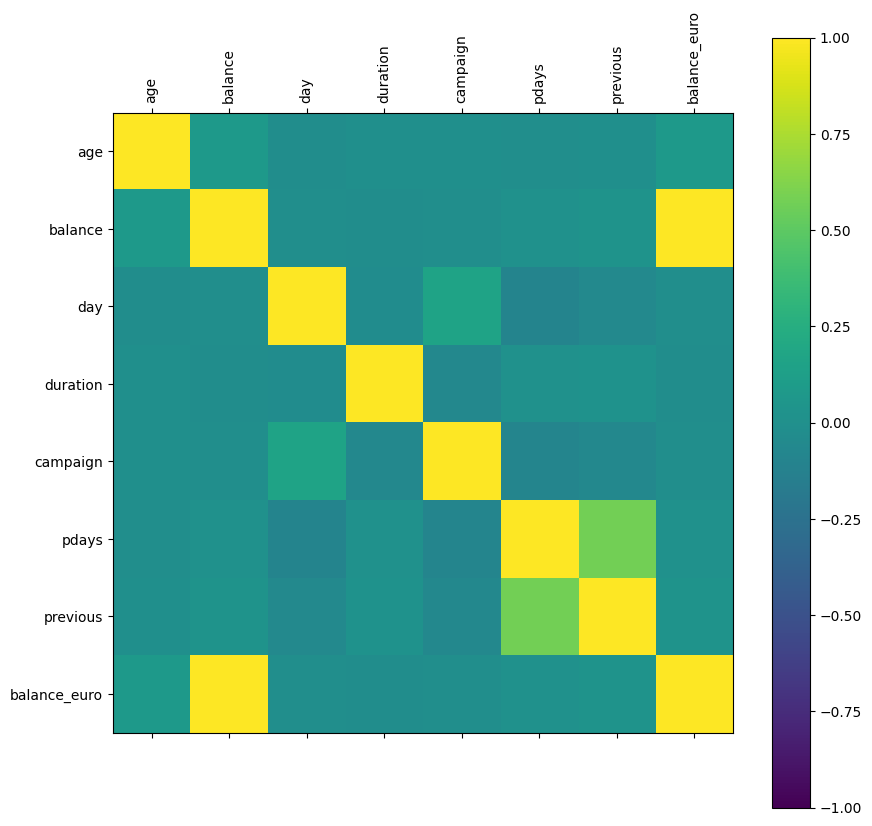

In [54]:
# Plot the correlations visually
fig, ax = plt.subplots(figsize=(10,10))

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
axes_labels = df_corelations.columns
plt.xticks(list(range(axes_labels.size)), axes_labels, rotation=90)
plt.yticks(list(range(axes_labels.size)), axes_labels)
plt.show()